<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/Random_forest_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/Company_Data (3).csv")

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data1 = pd.get_dummies(data, columns = ['ShelveLoc','Urban','US'])

In [9]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
data1["sales"]="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [11]:
data1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [12]:
X = data1.iloc[:,1:14]
Y = data1.iloc[:,14]

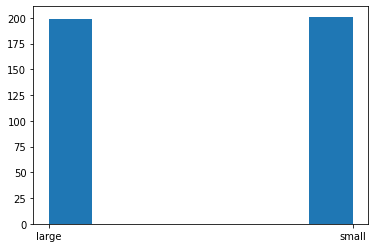

In [19]:
plt.hist(Y, bins = 7)
plt.show()

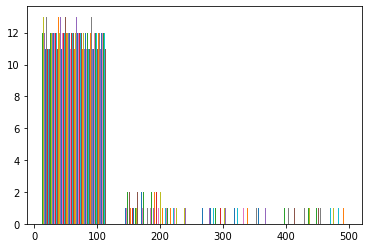

In [18]:
plt.hist(X, bins = 4)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


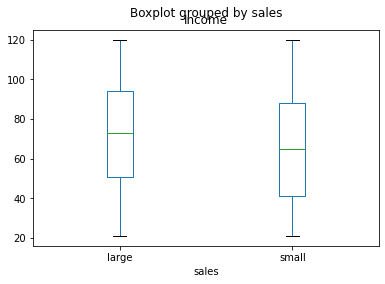

In [23]:
data1.boxplot(by ='sales', column =['Income'], grid = False)

In [13]:
x_train,x_test,y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [14]:
y_train.value_counts()

small    163
large    157
Name: sales, dtype: int64

In [ ]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.79375

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred_train)

array([[156,   0],
       [  0, 164]])

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
confusion_matrix(Y_test,pred_test)

array([[35,  8],
       [ 9, 28]])

In [ ]:
accuracy_score(Y_test,pred_test)

0.7875